## imports

In [23]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram,fcluster
from datetime import date,datetime,timedelta
import matplotlib.pyplot as plt

In [25]:
df =  pd.read_csv("consumption_loadcourse_excl_Linz.csv")

/Users/tamo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["day_of_year"] = df["datetime"].apply(lambda x: x.timetuple().tm_yday)

In [27]:
#filtering out all rows with zero values for Electricity_Demand
df = df[df["Electricity_Demand"] != 0]

In [28]:
#normalisation:
df['max_energy'] = df.groupby(['Fall_ge1'])['Electricity_Demand'].transform(max)
df['norm_energy'] = df['Electricity_Demand'] / df['max_energy']

In [29]:
#Meteorological seasons:
#winter
sdate_wi = date(2009, 12, 1)   # start date
edate_wi = date(2010, 2, 28)   # end date
#spring
sdate_sp = date(2010, 3, 1)   # start date
edate_sp = date(2010, 5, 31)   # end date
#summer
sdate_su = date(2010, 6, 1)   # start date
edate_su = date(2010, 8, 31)   # end date
#Fall
sdate_fa = date(2009, 9, 1)   # start date
edate_fa = date(2009, 11, 30)   # end date

In [30]:
#filter df by season:
df_fa = df[(df["datetime"] > str(sdate_fa)) & (df["datetime"] <= str(edate_fa))]
df_wi = df[(df["datetime"] > str(sdate_wi)) & (df["datetime"] <= str(edate_wi))]
df_sp = df[(df["datetime"] > str(sdate_sp)) & (df["datetime"] <= str(edate_sp))]
df_su = df[(df["datetime"] > str(sdate_su)) & (df["datetime"] <= str(edate_su))]

# Normalized data 

In [31]:
#create numpy array with mean for every hour of each ID as columns
red_df=df[["Fall_ge1","day_of_year","Hour_of_Day","norm_energy"]]
piv_df = pd.pivot_table(red_df,index = ["Hour_of_Day","day_of_year"],columns = "Fall_ge1",values="norm_energy")
grp_df = piv_df.groupby("Hour_of_Day").mean()
cluster_df = grp_df
cluster_df

Fall_ge1,1,2,3,4,5,6,9,10,12,13,...,1360,1361,1362,1363,1364,1365,1366,1367,1370,1371
Hour_of_Day,,,,,,,,,,,,,,,,,,,,,
1,0.056923,0.099543,0.127255,0.050243,0.070417,0.029283,0.033766,0.175463,0.100048,0.114323,...,0.033889,0.038401,0.072399,0.031991,0.020984,0.051664,0.038358,0.035390,0.038156,0.018161
2,0.048840,0.085852,0.121972,0.049117,0.057151,0.028494,0.028662,0.127119,0.060878,0.110086,...,0.034214,0.033683,0.067693,0.029565,0.020763,0.052869,0.031645,0.035061,0.025748,0.016120
3,0.047714,0.083339,0.120783,0.046696,0.049933,0.028655,0.027833,0.108846,0.046449,0.110371,...,0.034690,0.032681,0.068154,0.029256,0.021088,0.053863,0.028011,0.032108,0.021100,0.014483
4,0.046833,0.084898,0.120274,0.063494,0.047167,0.028981,0.028251,0.102195,0.044604,0.109924,...,0.038823,0.031844,0.065997,0.028601,0.020523,0.056583,0.028148,0.032101,0.023922,0.013492
5,0.049632,0.084675,0.121345,0.093208,0.046130,0.029165,0.030266,0.112022,0.044926,0.113110,...,0.038451,0.031131,0.066604,0.036225,0.055365,0.061868,0.035535,0.039582,0.020345,0.013820
6,0.061263,0.085292,0.120618,0.054988,0.048392,0.070246,0.033950,0.129226,0.044353,0.115461,...,0.065870,0.093338,0.074339,0.086897,0.106279,0.143290,0.074467,0.069340,0.025576,0.020493
7,0.071833,0.084510,0.117793,0.059575,0.052918,0.112826,0.039832,0.114321,0.044372,0.154600,...,0.069481,0.080019,0.098872,0.096842,0.048134,0.131129,0.088573,0.065043,0.026001,0.049756
8,0.097645,0.112070,0.120162,0.079836,0.050484,0.122726,0.050635,0.126405,0.074934,0.202527,...,0.083927,0.111494,0.088501,0.097447,0.061160,0.144554,0.078487,0.084548,0.042085,0.057781
9,0.104488,0.150470,0.131730,0.106767,0.071945,0.238999,0.073476,0.185754,0.147497,0.246585,...,0.079582,0.085820,0.097290,0.091561,0.086426,0.140513,0.098262,0.108721,0.069366,0.040230


In [32]:
#create distance matrix for the cluster algorithm
distance_matrix = cluster_df.corr()

##  Complete linkage

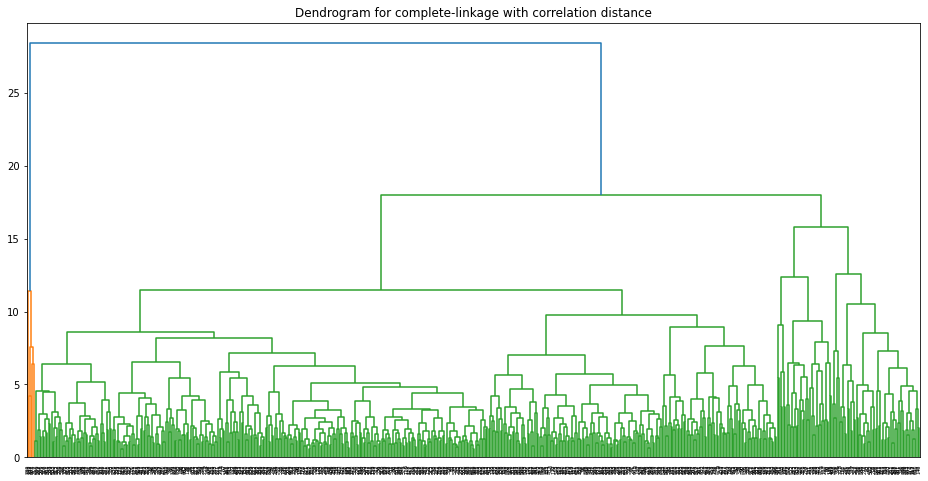

In [33]:
def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

linkage_matrix = hierarchical_clustering(distance_matrix)

# Single linkage

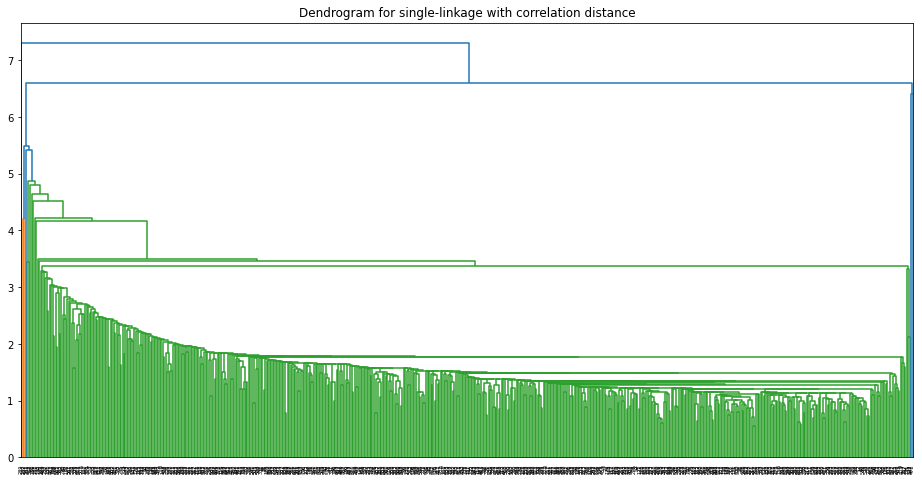

In [34]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "single")

# Average linkage

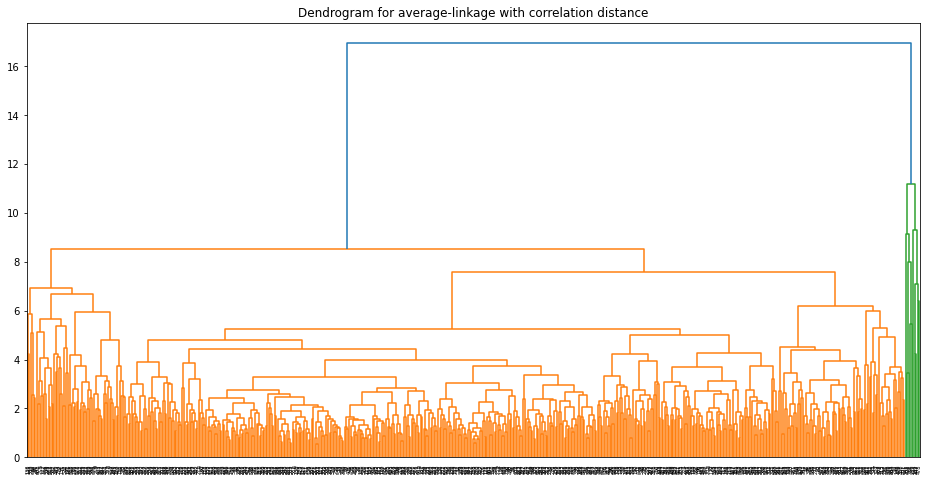

In [35]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "average")

# Ward linkage 

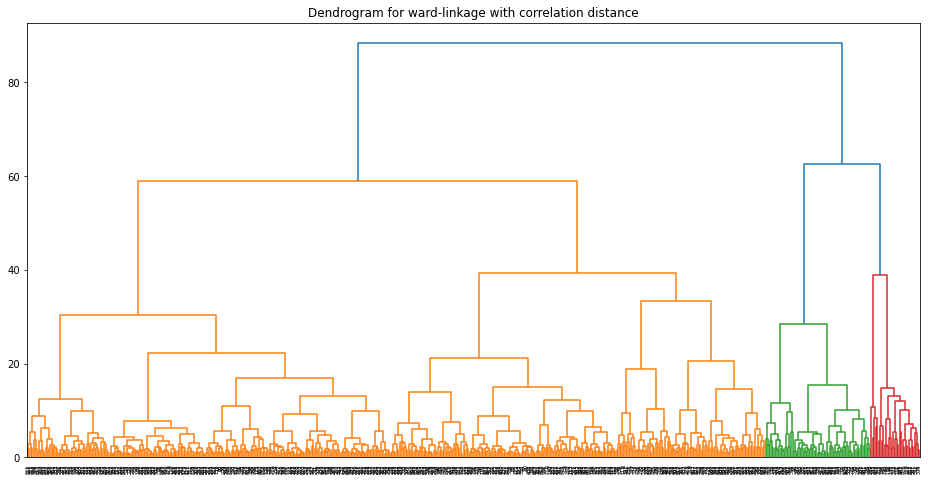

In [36]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "ward")

# Without normalization 

In [37]:
#create numpy array with mean for every hour of each ID as columns
red_df=df[["Fall_ge1","day_of_year","Hour_of_Day","Electricity_Demand"]]
piv_df = pd.pivot_table(red_df,index = ["Hour_of_Day","day_of_year"],columns = "Fall_ge1",values="Electricity_Demand")
grp_df = piv_df.groupby("Hour_of_Day").mean()
cluster_df = grp_df
cluster_df

Fall_ge1,1,2,3,4,5,6,9,10,12,13,...,1360,1361,1362,1363,1364,1365,1366,1367,1370,1371
Hour_of_Day,,,,,,,,,,,,,,,,,,,,,
1,246.193939,363.928144,522.125360,139.523876,410.107246,92.095652,179.700000,905.915430,181.587393,795.229769,...,143.484043,148.610599,198.155814,162.737864,65.049763,117.017937,193.249057,103.763441,94.626298,37.157821
2,211.233333,313.874251,500.449568,136.398876,332.846377,89.614493,152.537143,656.313056,110.492837,765.758671,...,144.862989,130.351852,185.274419,150.395122,64.364286,119.747748,159.426136,102.798387,63.855903,32.981793
3,206.363636,304.685629,495.572046,129.675562,290.807246,90.120290,148.127143,561.973294,84.305158,767.738439,...,146.879433,126.474654,186.537209,148.827670,65.372038,122.000000,141.116981,94.139785,52.328720,29.631285
4,202.554545,310.386228,493.482709,176.323034,274.698551,91.144928,150.351429,527.633531,80.957020,764.632948,...,164.375887,123.235023,180.634884,145.492718,63.620853,128.161435,141.807547,94.120968,59.326990,27.604749
5,214.657576,309.573353,497.880403,258.838483,268.662319,91.724638,161.075714,578.367953,81.541547,786.790462,...,162.799645,120.476852,182.295349,184.276699,171.632701,140.130045,179.026415,116.053763,50.455017,28.275140
6,264.962121,311.827844,494.897695,152.700843,281.833333,220.924638,180.682857,667.194362,80.500000,803.148844,...,278.893617,361.216590,203.465116,442.043689,329.464455,324.551570,375.166038,203.303763,63.429066,41.928771
7,310.678788,308.970060,483.304035,165.441011,308.197101,354.836232,211.984286,590.238872,80.534384,1075.398844,...,294.182624,309.675115,270.613953,492.635922,149.215640,297.006726,446.228302,190.706989,64.482699,101.800279
8,422.316667,409.729042,493.025937,221.705056,294.018841,385.973988,269.481429,652.630564,136.005731,1408.776012,...,355.345745,431.481567,242.227907,495.711165,189.597156,327.414798,395.416981,247.895161,104.370242,118.219274
9,451.909091,550.119760,540.489914,296.492978,419.007246,751.650289,391.041429,959.050445,267.706304,1715.242775,...,336.952128,332.122120,266.283721,465.771845,267.921801,318.262332,495.045283,318.768817,172.027682,82.311453


In [38]:
#create distance matrix for the cluster algorithm
distance_matrix = cluster_df.corr()

##  Complete linkage

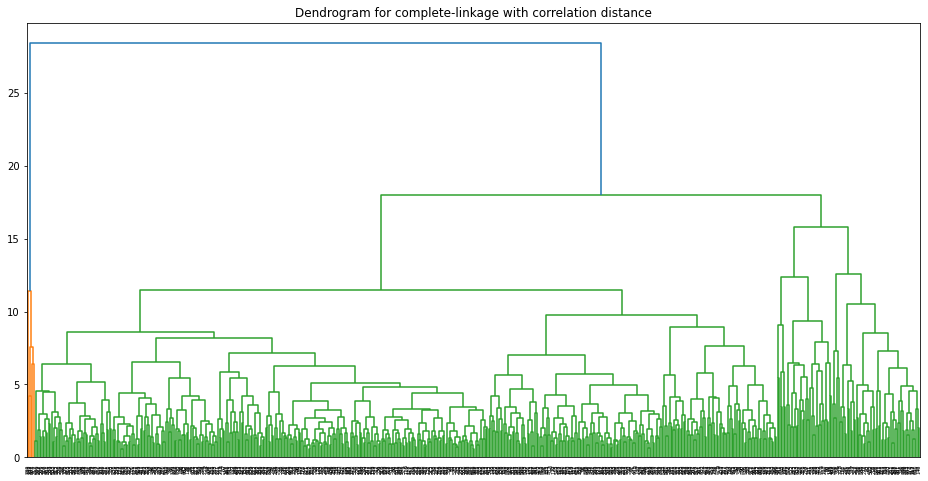

In [39]:
def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

linkage_matrix = hierarchical_clustering(distance_matrix)

# Single linkage

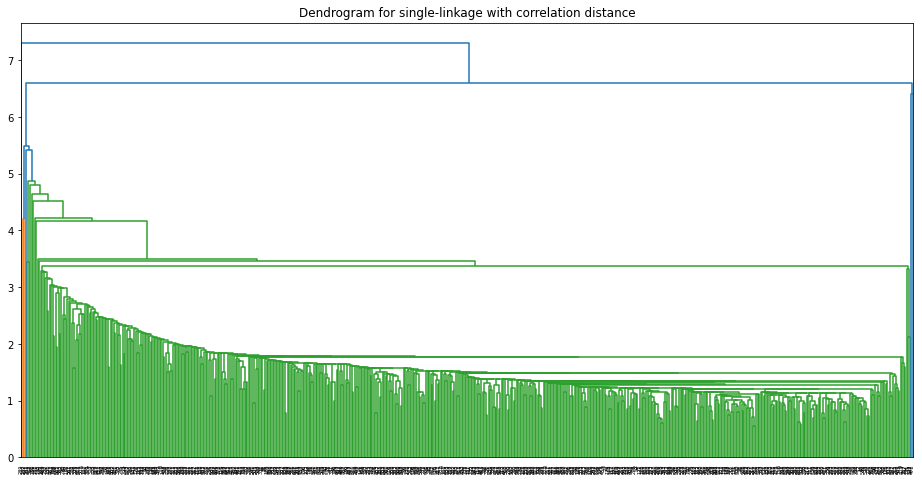

In [40]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "single")

# Average linkage

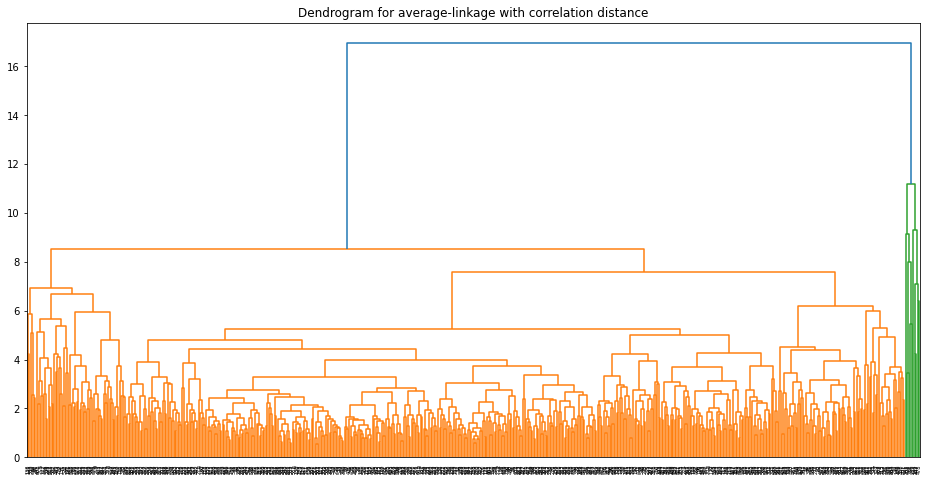

In [41]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "average")

# Ward linkage 

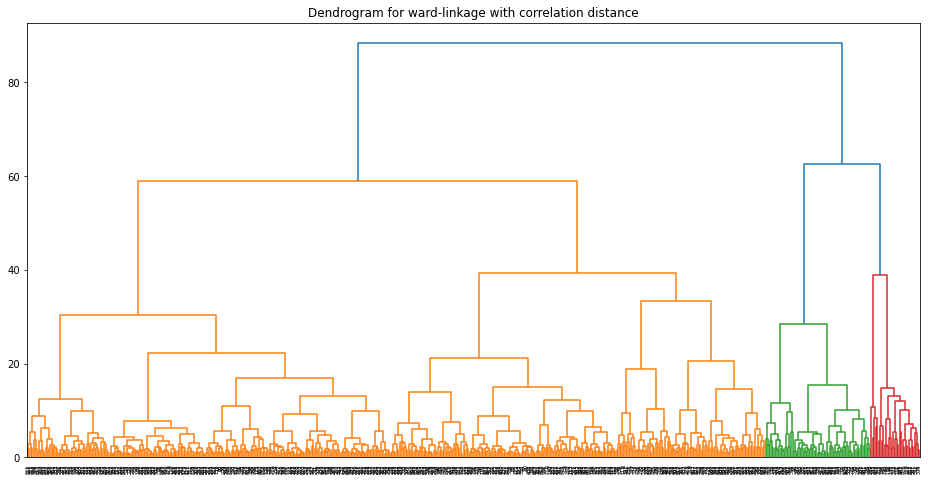

In [42]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "ward")

In [43]:
#I see no changes between with normalization and without, seems like the .corr() funktion works linear as well?

In [44]:
# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 4 unique clusters
cluster_labels = fcluster(linkage_matrix, 10, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 10 unique clusters

# hand-select an appropriate cut-off on the dendrogram
cluster_labels = fcluster(linkage_matrix,12 , criterion='distance')
print(np.unique(cluster_labels))
#>> 3 unique clusters
cluster_labels = fcluster(linkage_matrix, 10, criterion='distance')
print(np.unique(cluster_labels))
#>> 2 unique clusters

[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
